# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = mouse_metadata.merge(study_results,how='left',on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicate_mouse_ids = duplicate_mouse_ids['Mouse ID'].unique()
unique_duplicate_mouse_ids

array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID.
filtered_df = combined_df[combined_df['Mouse ID'] == 'g989']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID']!= 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame(
{'Mean Tumor Volume':drug_mean,
 'Median Tumor Volume':drug_median,
 'Tumor Volume Variance':drug_var,
 'Tumor Volume Std. Dev.':drug_std,
 'Tumor Volume Std. Err.':drug_sem,
}
)
summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_statistics_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

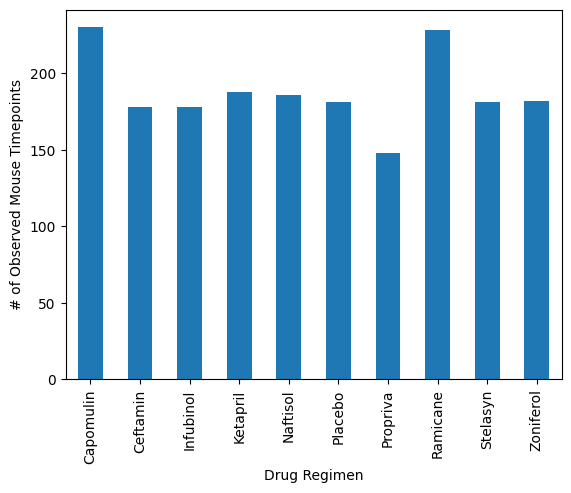

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# bar_plot_data = combined_df.groupby('Drug Regimen')['Mouse ID','Timepoint'].count()
bar_plot_data = clean_df.groupby('Drug Regimen').size()
chart = bar_plot_data.plot(kind='bar',x=bar_plot_data.index,y=bar_plot_data.values)
chart.set_xlabel('Drug Regimen')
chart.set_ylabel('# of Observed Mouse Timepoints')

<function matplotlib.pyplot.show(close=None, block=None)>

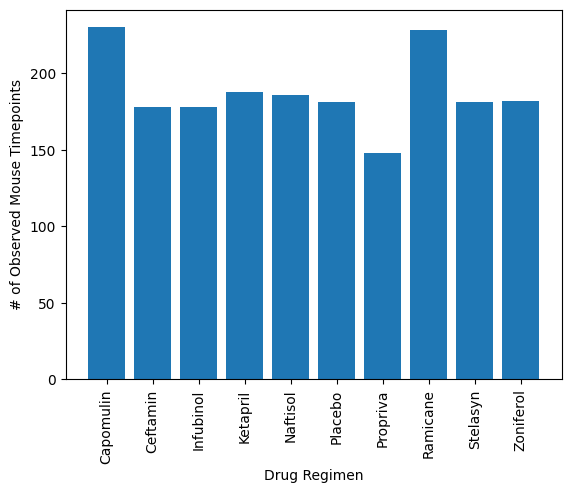

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(bar_plot_data.index,bar_plot_data.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show

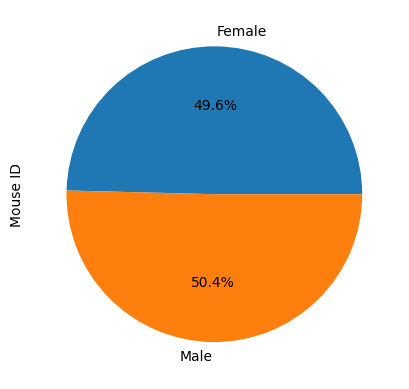

In [60]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_plot_data = clean_df.groupby('Sex')['Mouse ID'].nunique()
pie_plot_data
# Make the pie chart
pie_chart = pie_plot_data.plot(kind='pie',x=pie_plot_data.index,y=pie_plot_data.values,autopct='%1.1f%%')




<function matplotlib.pyplot.show(close=None, block=None)>

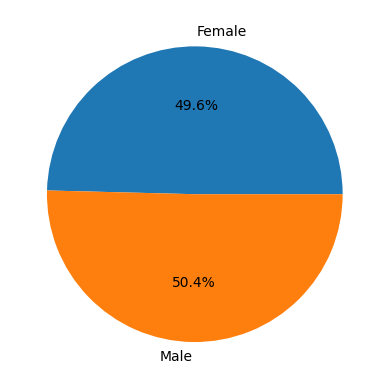

In [61]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_plot_data = clean_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
plt.pie(pie_plot_data.values,
        labels=pie_plot_data.index,
        autopct='%1.1f%%')
plt.show


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_df_4_regimen = clean_df[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
last_timepoint = clean_df_4_regimen.loc[clean_df_4_regimen.groupby('Mouse ID')['Timepoint'].idxmax()]
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    treatment_data = last_timepoint[last_timepoint['Drug Regimen'] == treatment]

    q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    tumor_vol_data.append({
        'Treatment': treatment,
        'Outliers': outliers['Tumor Volume (mm3)'].tolist(),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

for data in tumor_vol_data:
    print(f"{data['Treatment']}'s potential outliers: {data['Outliers']}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


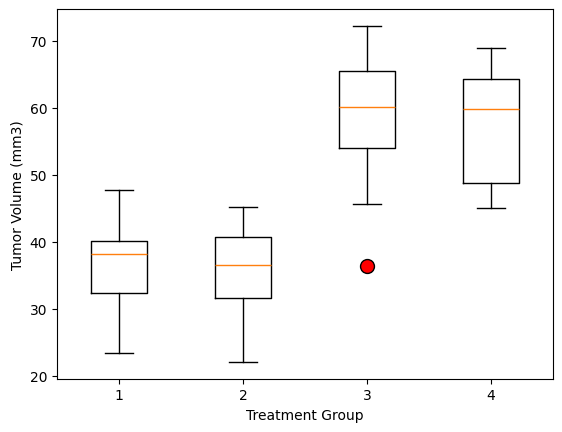

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

data = [last_timepoint[last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
# plt.figure(figsize=(10, 6))
flierprops=dict(marker='o', markerfacecolor='red', markersize=10)
plt.boxplot(data,label=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops=flierprops)
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

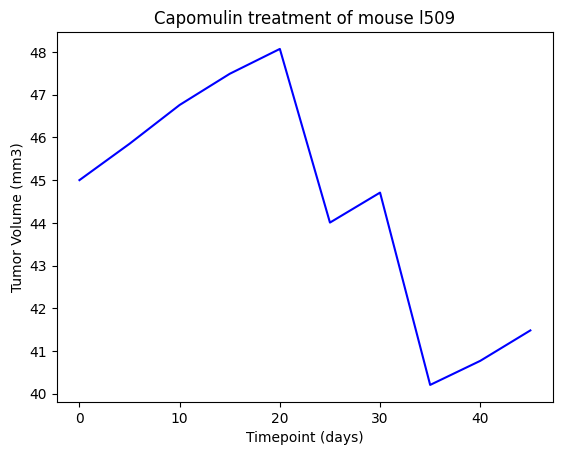

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_l509_data = clean_df[clean_df['Mouse ID']=='l509']
plt.plot(Capomulin_l509_data['Timepoint'],Capomulin_l509_data['Tumor Volume (mm3)'],color='blue')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


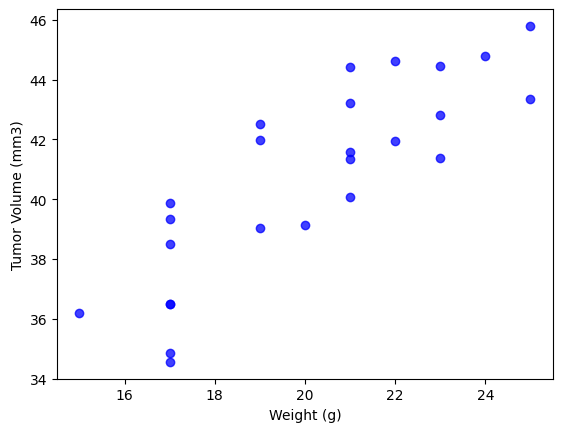

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_fitler_data = clean_df[clean_df['Drug Regimen']=='Capomulin']
Capomulin_tumor_vol_data = Capomulin_fitler_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Capomulin_weight_data = Capomulin_fitler_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(Capomulin_weight_data.values,Capomulin_tumor_vol_data.values,alpha=.75,c='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


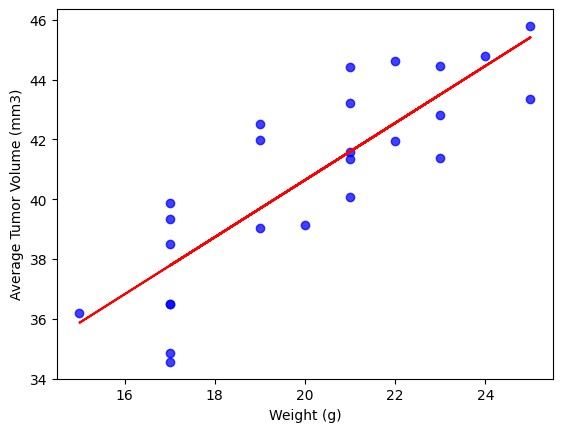

In [108]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
t = Capomulin_tumor_vol_data = Capomulin_fitler_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
w = Capomulin_weight_data = Capomulin_fitler_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = np.corrcoef(w, t)[0, 1]
correlation_coefficient= round(correlation_coefficient,2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')

slope, intercept, r_value, p_value, std_err = st.linregress(w, t)
line = slope * w + intercept

plt.scatter(w,t,alpha=.75,c='blue')
plt.plot(w, line, color='red', label='Fitted Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show() 
